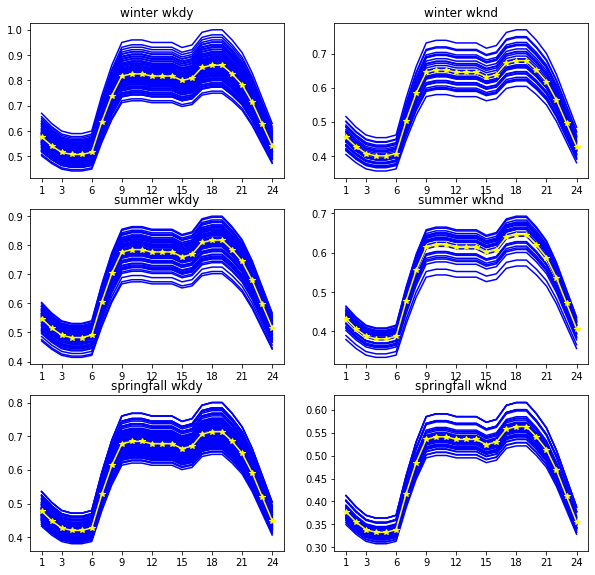

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import skewnorm

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

day = pd.read_csv('C:/Users/wltmd/Downloads/학교/캡스톤/첫번째 조별과제/daily.csv', header = None)
hour = pd.read_csv('C:/Users/wltmd/Downloads/학교/캡스톤/첫번째 조별과제/hourly.csv', header = None)
week = pd.read_csv('C:/Users/wltmd/Downloads/학교/캡스톤/첫번째 조별과제/weekly.csv', header = None)

data_day = day.values
data_hour = hour.values
data_week = week.values

winter_wkdy = np.zeros([24,85])
winter_wknd = np.zeros([24,34])
summer_wkdy = np.zeros([24,65])
summer_wknd = np.zeros([24,26])
springfall_wkdy = np.zeros([24,110])
springfall_wknd = np.zeros([24,44])

# winter wkdy
for i in range(0,8): #week
    for j in range(0,5): # day
        for k in range(0,24): # hour
            winter_wkdy[k,j+i*5] = 0.01 * data_week[i,0] * 0.01 * data_day[j,0] * 0.01 * data_hour[k,0]
            
for i in range(43,52): #week
    for j in range(0,5): # day
        for k in range(0,24): # hour
            winter_wkdy[k,j+(i-43)*5+40] = 0.01 * data_week[i,0] * 0.01 * data_day[j,0] * 0.01 * data_hour[k,0]

# winter wknd
for i in range(0,8): #week
    for j in range(5,7): # day
        for k in range(0,24): # hour
            winter_wknd[k,j-5+i*2] = 0.01 * data_week[i,0] * 0.01 * data_day[j,0] * 0.01 * data_hour[k,0]
            
for i in range(43,52): #week
    for j in range(5,7): # day
        for k in range(0,24): # hour
            winter_wknd[k,j-5+(i-43)*2+16] = 0.01 * data_week[i,0] * 0.01 * data_day[j,0] * 0.01 * data_hour[k,0]

# summer wkdy
for i in range(17,30): #week
    for j in range(0,5): # day
        for k in range(0,24): # hour
            summer_wkdy[k,j+(i-17)*5] = 0.01 * data_week[i,0] * 0.01 * data_day[j,0] * 0.01 * data_hour[k,0]
            
# summer wknd
for i in range(17,30): #week
    for j in range(5,7): # day
        for k in range(0,24): # hour
            summer_wknd[k,j-5+(i-17)*2] = 0.01 * data_week[i,0] * 0.01 * data_day[j,0] * 0.01 * data_hour[k,0]

# spring fall wkdy
for i in range(8,17): #week
    for j in range(0,5): # day
        for k in range(0,24): # hour
            springfall_wkdy[k,j+(i-8)*5] = 0.01 * data_week[i,0] * 0.01 * data_day[j,0] * 0.01 * data_hour[k,0]
            
for i in range(30,43): #week
    for j in range(0,5): # day
        for k in range(0,24): # hour
            springfall_wkdy[k,j+(i-30)*5+45] = 0.01 * data_week[i,0] * 0.01 * data_day[j,0] * 0.01 * data_hour[k,0]

# spring fall wknd
for i in range(8,17): #week
    for j in range(5,7): # day
        for k in range(0,24): # hour
            springfall_wknd[k,j-5+(i-8)*2] = 0.01 * data_week[i,0] * 0.01 * data_day[j,0] * 0.01 * data_hour[k,0]
            
for i in range(30,43): #week
    for j in range(5,7): # day
        for k in range(0,24): # hour
            springfall_wknd[k,j-5+(i-30)*2+18] = 0.01 * data_week[i,0] * 0.01 * data_day[j,0] * 0.01 * data_hour[k,0]


       


    #transpose를 해야하는 이유???
kmeans_winter_wkdy = KMeans(n_clusters=1, random_state=0).fit(winter_wkdy.T)
kmeans_winter_wknd = KMeans(n_clusters=1, random_state=0).fit(winter_wknd.T)
kmeans_summer_wkdy = KMeans(n_clusters=1, random_state=0).fit(summer_wkdy.T)
kmeans_summer_wknd = KMeans(n_clusters=1, random_state=0).fit(summer_wknd.T)
kmeans_springfall_wkdy = KMeans(n_clusters=1, random_state=0).fit(springfall_wkdy.T)
kmeans_springfall_wknd = KMeans(n_clusters=1, random_state=0).fit(springfall_wknd.T)


x = np.arange(1,25)
x1 = [1,3,6,9,12,15,18,21,24] # plot 그릴 때 x축에 보이는 값들을 나타낸다.

plt.figure(figsize=(10,20))

plt.subplot(621)
plt.plot(x, winter_wkdy, color = 'blue')
plt.xticks(x1)
plt.title('winter wkdy')
plt.plot(x, kmeans_winter_wkdy.cluster_centers_[0,:], marker = '*', c = 'yellow', zorder = 85);

plt.subplot(622)
plt.plot(x, winter_wknd, color = 'blue')
plt.xticks(x1)
plt.title('winter wknd')
plt.plot(x, kmeans_winter_wknd.cluster_centers_[0,:], marker = '*', c = 'yellow', zorder = 34);

plt.subplot(623)
plt.plot(x, summer_wkdy, color = 'blue')
plt.xticks(x1)
plt.title('summer wkdy')
plt.plot(x, kmeans_summer_wkdy.cluster_centers_[0,:], marker = '*', c = 'yellow', zorder = 65);

plt.subplot(624)
plt.plot(x, summer_wknd, color = 'blue')
plt.xticks(x1)
plt.title('summer wknd')
plt.plot(x, kmeans_summer_wknd.cluster_centers_[0,:], marker = '*', c = 'yellow', zorder = 26);

plt.subplot(625)
plt.plot(x, springfall_wkdy, color = 'blue')
plt.xticks(x1)
plt.title('springfall wkdy')
plt.plot(x, kmeans_springfall_wkdy.cluster_centers_[0,:], marker = '*', c = 'yellow', zorder = 65);

plt.subplot(626)
plt.plot(x, springfall_wknd, color = 'blue')
plt.xticks(x1)
plt.title('springfall wknd')
plt.plot(x, kmeans_springfall_wknd.cluster_centers_[0,:], marker = '*', c = 'yellow', zorder = 26);

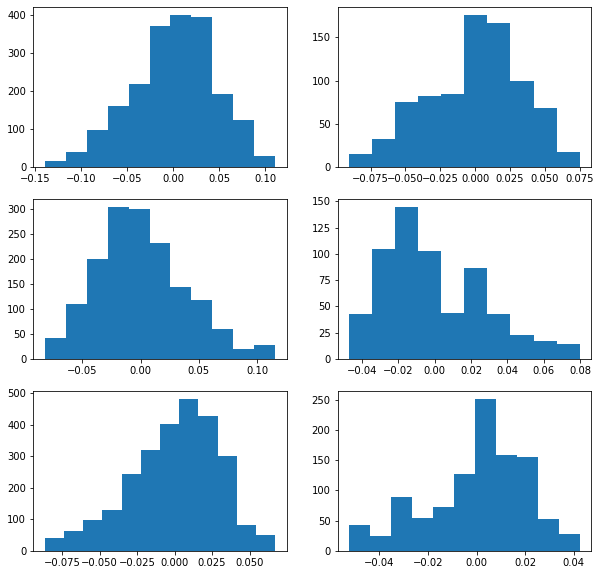

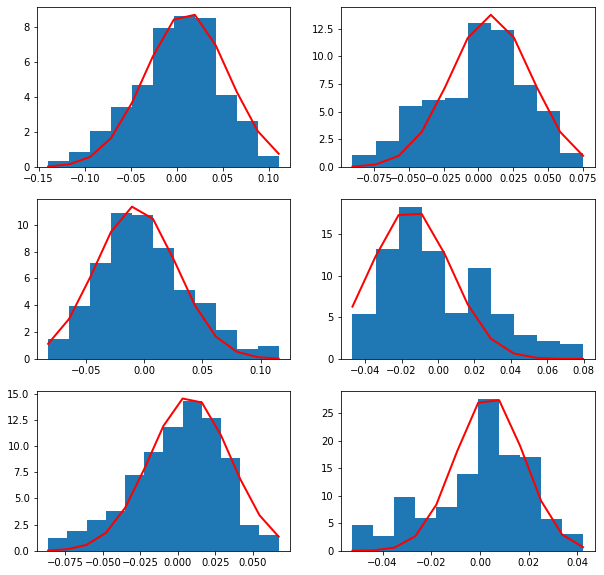

In [22]:
# 오차값 찾기
winter_wkdy_error = kmeans_winter_wkdy.cluster_centers_.T - winter_wkdy
winter_wknd_error = kmeans_winter_wknd.cluster_centers_.T - winter_wknd
summer_wkdy_error = kmeans_summer_wkdy.cluster_centers_.T - summer_wkdy
summer_wknd_error = kmeans_summer_wknd.cluster_centers_.T - summer_wknd
springfall_wkdy_error = kmeans_springfall_wkdy.cluster_centers_.T - springfall_wkdy
springfall_wknd_error = kmeans_springfall_wknd.cluster_centers_.T - springfall_wknd


# 이차원 배열을 일차원 배열로 바꾸기
winter_wkdy_error2 = winter_wkdy_error.ravel()
winter_wknd_error2 = winter_wknd_error.ravel()
summer_wkdy_error2 = summer_wkdy_error.ravel()
summer_wknd_error2 = summer_wknd_error.ravel()
springfall_wkdy_error2 = springfall_wkdy_error.ravel()
springfall_wknd_error2 = springfall_wknd_error.ravel()


# 히스토그램 그리기 ## y값이 100단위인 것은 ravel했을 때 2000단위가 뜨는 것을 생각해보면 개수라고 생각할 수 있음.

plt.figure(figsize=(10,10))
plt.subplot(321)
plt.hist(winter_wkdy_error2, bins = 11)
plt.subplot(322)
plt.hist(winter_wknd_error2, bins = 10)
plt.subplot(323)
plt.hist(summer_wkdy_error2, bins = 11)
plt.subplot(324)
plt.hist(summer_wknd_error2, bins = 10)
plt.subplot(325)
plt.hist(springfall_wkdy_error2, bins = 12)
plt.subplot(326)
plt.hist(springfall_wknd_error2, bins = 11);

plt.figure(figsize=(10,10))

plt.subplot(321)
mu, sigma = 0.011, 0.045
count, bins, ignored = plt.hist(winter_wkdy_error2, 11, density=True)
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)), linewidth = 2, color = 'r')

plt.subplot(322)
mu, sigma = 0.009, 0.029
count, bins, ignored = plt.hist(winter_wknd_error2, 10, density=True)
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)), linewidth = 2, color = 'r')

plt.subplot(323)
mu, sigma = -0.007, 0.035
count, bins, ignored = plt.hist(summer_wkdy_error2, 11, density=True)
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)), linewidth = 2, color = 'r')

plt.subplot(324)
mu, sigma = -0.015, 0.022
count, bins, ignored = plt.hist(summer_wknd_error2, 10, density=True)
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)), linewidth = 2, color = 'r')

plt.subplot(325)
mu, sigma = 0.008, 0.027
count, bins, ignored = plt.hist(springfall_wkdy_error2, 12, density=True)
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)), linewidth = 2, color = 'r')

plt.subplot(326)
count, bins, ignored = plt.hist(springfall_wknd_error2, 11, density=True)
mu, sigma = 0.004, 0.014
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)), linewidth = 2, color = 'r')
plt.show()

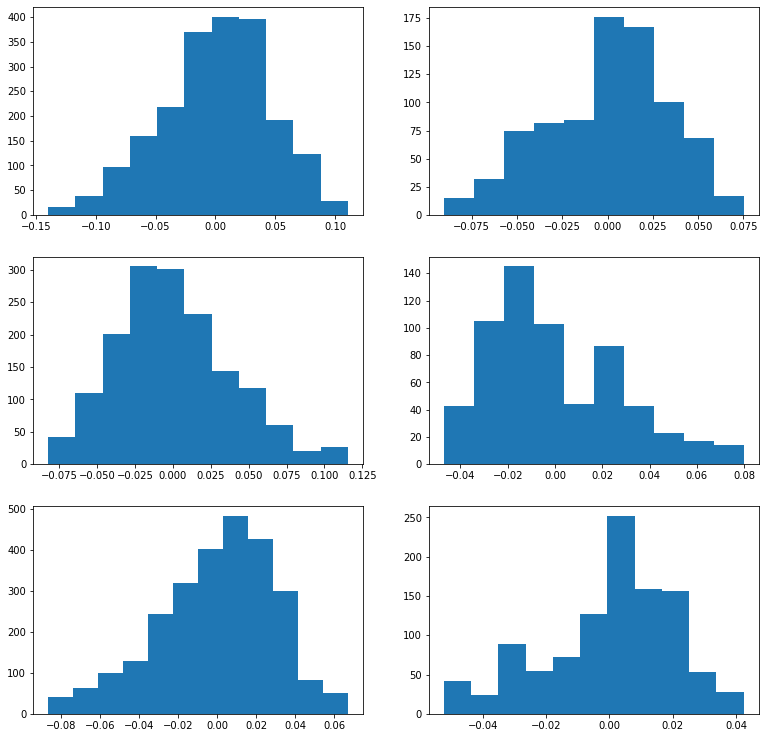

In [20]:
# 추정된 확률분포를 기반으로 오차를 재생성


# plt.figure(figsize=(13,13))
# plt.subplot(321)
# plt.hist(winter_wkdy_error2, bins = 11)
# plt.subplot(322)
# plt.hist(winter_wknd_error2, bins = 10)
# plt.subplot(323)
# plt.hist(summer_wkdy_error2, bins = 11)
# plt.subplot(324)
# plt.hist(summer_wknd_error2, bins = 10)
# plt.subplot(325)
# plt.hist(springfall_wkdy_error2, bins = 12)
# plt.subplot(326)
# plt.hist(springfall_wknd_error2, bins = 11);

# dis_wwd = skewnorm(-2.5, 0.015, np.std(winter_wkdy_error2)).rvs(size=10000)
# # plt.hist(dis_wwd, bins=300);
# dis_wwd_24 = skewnorm(-2.5, 0.015, np.std(winter_wkdy_error2)).rvs(size=24)
# cen_wwd2 = kmeans_winter_wkdy.cluster_centers_ + dis_wwd_24

# dis_wnd = skewnorm(-2.5, 0.015, np.std(winter_wknd_error2)).rvs(size=10000)
# # plt.hist(dis_wnd, bins=300);
# dis_wnd_24 = skewnorm(-2.5, 0.015, np.std(winter_wknd_error2)).rvs(size=24)
# cen_wnd2 = kmeans_winter_wknd.cluster_centers_ + dis_wnd_24

# dis_swd = skewnorm(-2.5, 0.015, np.std(summer_wkdy_error2)).rvs(size=10000)
# # plt.hist(dis_swd, bins=300);
# dis_swd_24 = skewnorm(-2.5, 0.015, np.std(summer_wkdy_error2)).rvs(size=24)
# cen_swd2 = kmeans_summer_wkdy.cluster_centers_ + dis_swd_24

# dis_snd = skewnorm(-2.5, 0.015, np.std(summer_wknd_error2)).rvs(size=10000)
# # plt.hist(dis_snd, bins=300);
# dis_snd_24 = skewnorm(-2.5, 0.015, np.std(summer_wknd_error2)).rvs(size=24)
# cen_snd2 = kmeans_summer_wknd.cluster_centers_ + dis_snd_24

# dis_sfdy = skewnorm(-2.5, 0.015, np.std(springfall_wkdy_error2)).rvs(size=10000)
# # plt.hist(dis_sfdy, bins=300);
# dis_sfdy_24 = skewnorm(-2.5, 0.015, np.std(springfall_wkdy_error2)).rvs(size=24)
# cen_sfdy2 = kmeans_springfall_wkdy.cluster_centers_ + dis_sfdy_24

# dis_sfnd = skewnorm(-2.5, 0.015, np.std(springfall_wknd_error2)).rvs(size=10000)
# # plt.hist(dis_sfnd, bins=300);
# dis_sfnd_24 = skewnorm(-2.5, 0.015, np.std(springfall_wknd_error2)).rvs(size=24)
# cen_sfnd2 = kmeans_springfall_wknd.cluster_centers_ + dis_sfnd_24

# plt.figure(figsize=(15,15))

plt.subplot(321)
plt.title('winter Weekday')
plt.xticks([1,6,12,18,24])
plt.plot(x, kmeans_winter_wkdy.cluster_centers_[0,:], marker = 'o', c = 'blue', zorder=24)
plt.plot(x, winter_wkdy, color = 'yellow')
plt.plot(x, cen_wwd2.T, c = 'red', zorder=23);

# plt.subplot(322)
# plt.title('winter Weekend')
# plt.xticks([1,6,12,18,24])
# plt.plot(x, kmeans_winter_wknd.cluster_centers_[0,:], marker = 'o', c = 'blue', zorder=24)
# plt.plot(x, winter_wknd, color = 'yellow')
# plt.plot(x, cen_wnd2.T, c = 'red', zorder=23);

# plt.subplot(323)
# plt.title('summer Weekday')
# plt.xticks([1,6,12,18,24])
# plt.plot(x, kmeans_summer_wkdy.cluster_centers_[0,:], marker = 'o', c = 'blue', zorder=24)
# plt.plot(x, summer_wkdy, color = 'yellow')
# plt.plot(x, cen_swd2.T, c = 'red', zorder=23);

# plt.subplot(324)
# plt.title('summer Weekend')
# plt.xticks([1,6,12,18,24])
# plt.plot(x, kmeans_summer_wknd.cluster_centers_[0,:], marker = 'o', c = 'blue', zorder=24)
# plt.plot(x, summer_wknd, color = 'yellow')
# plt.plot(x, cen_snd2.T, c = 'red', zorder=23);

# plt.subplot(325)
# plt.title('Spring/Fall Weekday')
# plt.xticks([1,6,12,18,24])
# plt.plot(x, kmeans_springfall_wkdy.cluster_centers_[0,:], marker = 'o', c = 'blue', zorder=24)
# plt.plot(x, springfall_wkdy, color = 'yellow')
# plt.plot(x, cen_sfdy2.T, c = 'red', zorder=23);

# plt.subplot(326)
# plt.title('Spring/Fall Weekend')
# plt.xticks([1,6,12,18,24])
# plt.plot(x, kmeans_springfall_wknd.cluster_centers_[0,:], marker = 'o', c = 'blue', zorder=24)
# plt.plot(x, springfall_wknd, color = 'yellow')
# plt.plot(x, cen_sfnd2.T, c = 'red', zorder=23);

# 대표곡선에 재생성된 오차를 반영